In [1]:
!pip3 install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip3 install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=055304cdfe2c8101f2b9747e6726dffe73c1e35dd2e49d18dc4ab77613356d88
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [3]:
!pip3 install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip3 install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense


import warnings
warnings.filterwarnings('ignore')

In [6]:
np.random.seed(123) #Escolhendo uma seed para o numpy
tf.random.set_seed(123) #Escolhendo uma seed para o tensorflow

<h3>Importando DataSet</h3>

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #pegando dados de treino e teste

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
type(x_train) #verificando o tipo de dados presente na variavel de treino

numpy.ndarray

In [9]:
aleatorio = np.random.randint(low=0, high=x_test.shape[0])
aleatorio1 = np.random.randint(low=0, high=x_test.shape[0])
aleatorio2 = np.random.randint(low=0, high=x_test.shape[0])
aleatorio3 = np.random.randint(low=0, high=x_test.shape[0])
print(aleatorio, aleatorio1, aleatorio2, aleatorio3)

3582 1346 5218 7763


In [10]:
#pegando um dados para usar como teste 
digit = x_test[aleatorio]
digit1 = x_test[aleatorio1]
digit2 = x_test[aleatorio2]
digit3 = x_test[aleatorio3]

In [11]:
print("Tamanho treino: ", x_train.shape, y_train.shape)

Tamanho treino:  (60000, 28, 28) (60000,)


In [12]:
print("Tamanho teste: ", x_test.shape, y_test.shape)

Tamanho teste:  (10000, 28, 28) (10000,)


<h3>Normalizando os dados</h3>

In [13]:
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

print("Nova forma: ", x_train.shape)

Nova forma:  (60000, 784)


In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
x_train[100][0] #Visualizando 

0.0

<h3>Criando a Rede</h3>

In [16]:
MLP = Sequential()

In [17]:
#Adicionando as camadas
MLP.add(InputLayer(input_shape=(784, )))
MLP.add(Dense(256, activation='relu'))
MLP.add(Dense(256, activation='relu'))
MLP.add(Dense(10, activation='softmax'))
        
MLP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [18]:
#Compilando o modelo

MLP.compile(loss='categorical_crossentropy', #adicionando a funcao de perda, caso fosse um caso de classificacao binaria, teriamos que usar
            #o "binary_crossentropy"
            optimizer='adam', #a funcao de otimizacao, sera a Adam
            metrics=['accuracy', 'AUC', 'Recall', 'Precision']) #adicionando algumas metricas para avaliar o modelo posteriormente

In [19]:
MLP.fit(x_train, y_train, epochs=20, batch_size=128) #efetuando o treinamento do modelo, usando 20 epocas de inicio

Epoch 1/20
469/469 [==============================] - 5s 8ms/step - loss: 0.2646 - accuracy: 0.9250 - auc: 0.9944 - recall: 0.8952 - precision: 0.9514
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0999 - accuracy: 0.9696 - auc: 0.9986 - recall: 0.9651 - precision: 0.9747
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0652 - accuracy: 0.9795 - auc: 0.9993 - recall: 0.9773 - precision: 0.9823
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0450 - accuracy: 0.9861 - auc: 0.9995 - recall: 0.9847 - precision: 0.9879
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0343 - accuracy: 0.9890 - auc: 0.9996 - recall: 0.9878 - precision: 0.9904
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0272 - accuracy: 0.9915 - auc: 0.9998 - recall: 0.9908 - precision: 0.9922
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0239 - accuracy:

#Visualizando algumas metricas

In [20]:
#calculando algumas metricas necessarias para avaliar o modelo

test_loss, test_acc, test_auc, test_recall, test_precision = MLP.evaluate(x_test, y_test,
                                   batch_size=128,
                                   verbose=1)

79/79 [==============================] - 1s 4ms/step - loss: 0.0935 - accuracy: 0.9815 - auc: 0.9966 - recall: 0.9813 - precision: 0.9821


In [21]:
print("Test loss: ", test_loss) #Perda
print("Test accuracy: ", test_acc) #Acuracia
print("Test auc: ", test_auc) #AUC ROC (area embaixo da curva roc)
print("Test recall: ", test_recall) #Recall
print("Test precision: ", test_precision) #Precision

Test loss:  0.09348396956920624
Test accuracy:  0.9815000295639038
Test auc:  0.9966078400611877
Test recall:  0.9812999963760376
Test precision:  0.982085645198822


#Testando o modelo

array([[1.3279434e-11, 9.9906296e-01, 9.9380584e-09, 3.8604696e-08,
        7.0082127e-09, 1.1658093e-06, 5.3681473e-13, 6.5375327e-09,
        9.3588483e-04, 4.8982538e-09]], dtype=float32)

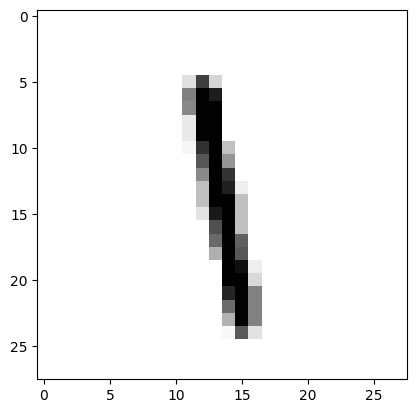

In [22]:
plt.imshow(digit, cmap="binary") #plotando a imagem do numero escolhido 

digit = np.reshape(digit, (1, 784)) #normalizando a predicao, para deixar igual ao teste e treino
digit = digit.astype('float32') / 255

MLP.predict(digit, verbose=0) #fazendo a predicao, ira retornar um vetor

In [23]:
np.argmax(MLP.predict(digit, verbose=0)) #retornando o valor maximo do vetor de predicao

1

array([[7.6771863e-16, 8.8215550e-08, 3.3325320e-13, 7.4151785e-10,
        6.1790345e-17, 1.4156618e-11, 4.0049023e-16, 9.9999988e-01,
        2.1083486e-11, 2.2457836e-09]], dtype=float32)

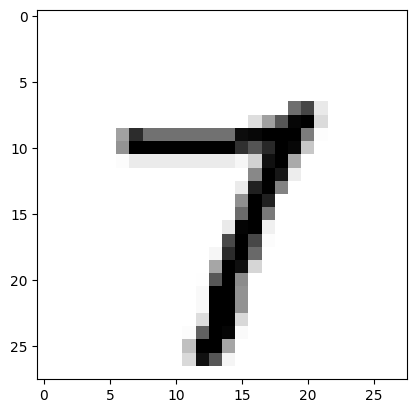

In [24]:
plt.imshow(digit1, cmap="binary") #plotando a imagem do numero escolhido 

digit1 = np.reshape(digit1, (1, 784)) #normalizando a predicao, para deixar igual ao teste e treino
digit1 = digit1.astype('float32') / 255

MLP.predict(digit1, verbose=0) #fazendo a predicao, ira retornar um vetor

In [25]:
np.argmax(MLP.predict(digit1, verbose=0)) #retornando o valor maximo do vetor de predicao

7

#Salvando o modelo

In [ ]:
model_json = MLP.to_json()
with open("MLP.json", "w") as json_file:
    json_file.write(model_json) #salvando o modelo como .json

MLP.save_weights("MLP.h5") #salvando os pesos da rede 
print("Salvando o modelo")

Salvando o modelo


#Visualizando o modelo

In [ ]:
from ann_visualizer.visualize import ann_viz; #Importando as bibliotecas necessarias para visualizar a arquitetura do modelo
from keras.models import model_from_json

In [ ]:
json_file = open('MLP.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

In [ ]:
model = model_from_json(loaded_model_json) #Lendo o modelo que foi salvo como json

In [ ]:
model.load_weights("MLP.h5") #Lendo e armazenando os pesos do modelo

ann_viz(model, title="MLP - Model Visualization") #Criando um aquivo .pdf que ira mostrar como o modelo funciona, 

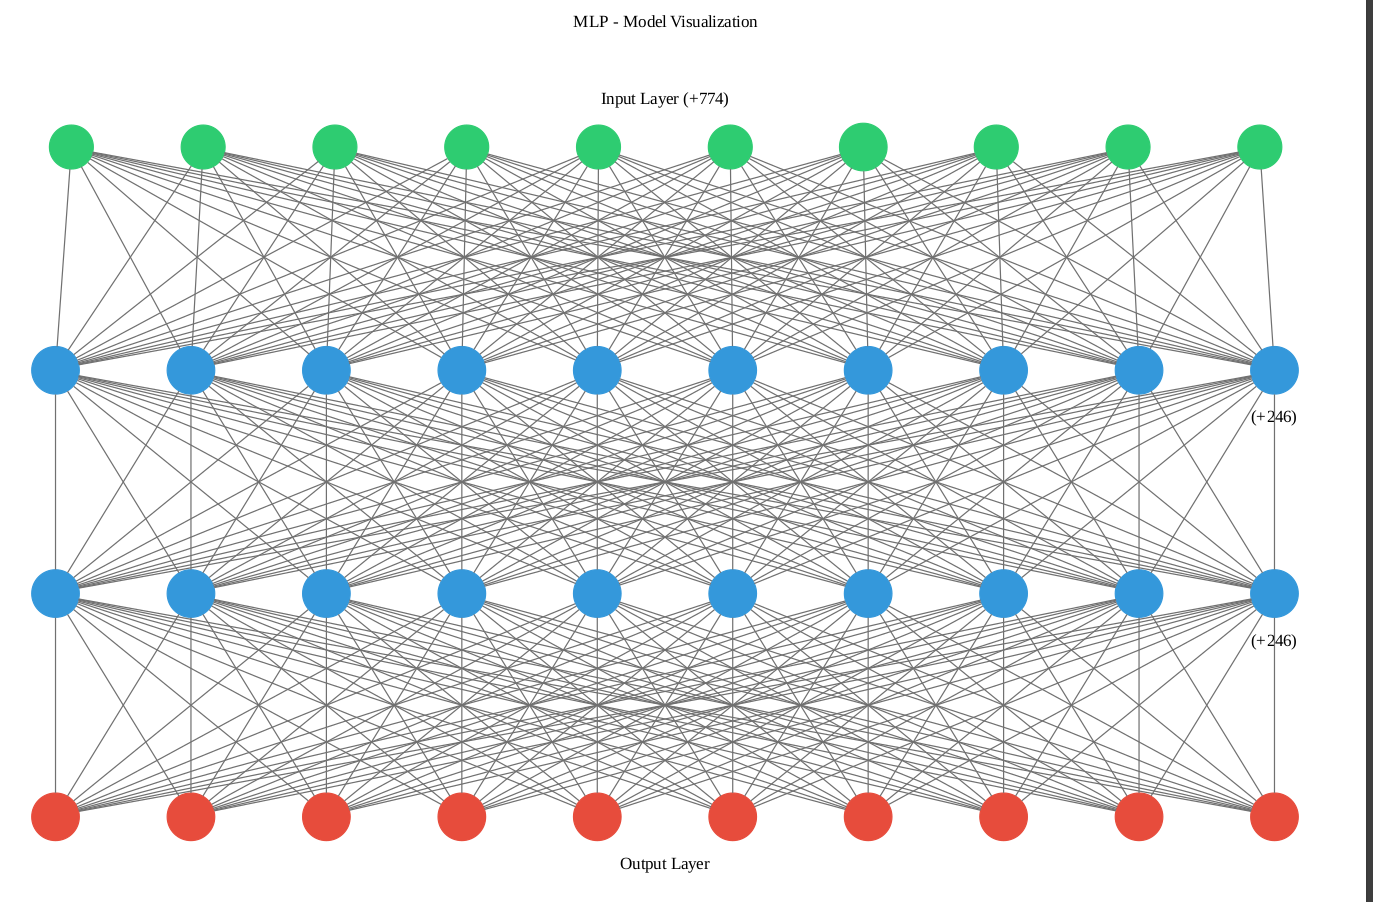

#Tunnig de Hiperparametros - Hyperband

Seguindo esse tutorial: https://www.tensorflow.org/tutorials/keras/keras_tuner?hl=pt-br

In [26]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.0 MB/s eta 0:00:00


In [27]:
import keras_tuner as kt

In [28]:
#essa funcao ira servir como base para todos os metodos de tunning

def model_builder(hp):
  MLP = Sequential()

  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)

  MLP.add(InputLayer(input_shape=(784, )))
  MLP.add(Dense(hp_units, activation='relu'))
  MLP.add(Dense(256, activation='relu'))
  MLP.add(Dense(10, activation='softmax'))

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  MLP.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='categorical_crossentropy',
                metrics=['accuracy', 'AUC', 'Recall', 'Precision']) #metricas que serao utilizadas para avaliar o modelo

  return MLP

In [29]:
tuner = kt.Hyperband(model_builder,   #Usando o metodo hiperband para otimizacao dos parametros
                     objective='accuracy', #o objetivo nesse caso, poderia ser qualquer metrica, como AUC, por exemplo
                     max_epochs=20,
                     factor=3,
                     directory='',
                     project_name='Projeto_1')

In [30]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [31]:
tuner.search(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early]) #Procurando os melhores parametros, usando 50 epocas

Trial 30 Complete [00h 03m 23s]
accuracy: 0.9778125286102295

Best accuracy So Far: 0.999666690826416
Total elapsed time: 00h 51m 08s


In [32]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0] #Pegando os melhores parametros 

In [33]:
print(best_hps.get('learning_rate')) #Mostrando a melhor taxa de aprendizado

0.0001


In [36]:
model = tuner.hypermodel.build(best_hps) #construindo o novo modelo com os melhore parametros encontrado
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2) #treinando o modelo

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1 #pegando o index da melhor epoca no treinamento
print('Best epoch: %d' % (best_epoch,)) #printando qual foi a melhor epoca

Epoch 1/50
1500/1500 [==============================] - 16s 10ms/step - loss: 0.4118 - accuracy: 0.8923 - auc: 0.9904 - recall: 0.8158 - precision: 0.9484 - val_loss: 0.2042 - val_accuracy: 0.9428 - val_auc: 0.9962 - val_recall: 0.9282 - val_precision: 0.9585
Epoch 2/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1768 - accuracy: 0.9491 - auc: 0.9971 - recall: 0.9382 - precision: 0.9613 - val_loss: 0.1496 - val_accuracy: 0.9578 - val_auc: 0.9975 - val_recall: 0.9494 - val_precision: 0.9681
Epoch 3/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1262 - accuracy: 0.9635 - auc: 0.9983 - recall: 0.9561 - precision: 0.9719 - val_loss: 0.1290 - val_accuracy: 0.9623 - val_auc: 0.9979 - val_recall: 0.9567 - val_precision: 0.9689
Epoch 4/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0966 - accuracy: 0.9730 - auc: 0.9989 - recall: 0.9676 - precision: 0.9784 - val_loss: 0.1123 - val_accuracy: 0.9657 - val_auc: 0.9982 - val

In [37]:
hypermodel = tuner.hypermodel.build(best_hps) #criando outro modelo, pegando os melhores parametros

In [ ]:
hypermodel.fit(x_train, y_train, epochs=best_epoch, validation_split=0.2) #treinando um novo modelo, com os melhores parametros, 
#e com as melhores epocas

Epoch 1/40
1500/1500 [==============================] - 17s 10ms/step - loss: 0.4133 - accuracy: 0.8912 - auc: 0.9902 - recall: 0.8158 - precision: 0.9470 - val_loss: 0.2007 - val_accuracy: 0.9442 - val_auc: 0.9964 - val_recall: 0.9297 - val_precision: 0.9607
Epoch 2/40
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1754 - accuracy: 0.9493 - auc: 0.9971 - recall: 0.9384 - precision: 0.9619 - val_loss: 0.1487 - val_accuracy: 0.9584 - val_auc: 0.9975 - val_recall: 0.9506 - val_precision: 0.9681
Epoch 3/40
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1256 - accuracy: 0.9633 - auc: 0.9983 - recall: 0.9562 - precision: 0.9718 - val_loss: 0.1282 - val_accuracy: 0.9626 - val_auc: 0.9979 - val_recall: 0.9558 - val_precision: 0.9690
Epoch 4/40
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0963 - accuracy: 0.9730 - auc: 0.9989 - recall: 0.9676 - precision: 0.9786 - val_loss: 0.1095 - val_accuracy: 0.9666 - val_auc: 0.9983 - val

In [ ]:
result = hypermodel.evaluate(x_test, y_test)
print("[test loss, test accuracy]:", result)

313/313 [==============================] - 1s 3ms/step - loss: 0.0975 - accuracy: 0.9802 - auc: 0.9963 - recall: 0.9799 - precision: 0.9807
[test loss, test accuracy]: [0.09754779189825058, 0.9801999926567078, 0.9962802529335022, 0.9799000024795532, 0.9806845188140869]


#Comparando metricas:

In [ ]:
print("Test loss: ", test_loss) #Perda
print("Test accuracy: ", test_acc) #Acuracia
print("Test auc: ", test_auc) #AUC ROC (area embaixo da curva roc)
print("Test recall: ", test_recall) #Recall
print("Test precision: ", test_precision) #Precision

Test loss:  0.10732024908065796
Test accuracy:  0.9790999889373779
Test auc:  0.9963011145591736
Test recall:  0.9787999987602234
Test precision:  0.9792896509170532


In [ ]:
print("loss: ", result[0])
print("accuracy: ", result[1])
print("auc: ", result[2])
print("recall: ", result[3])
print("precision: ", result[4])

loss:  0.09754779189825058
accuracy:  0.9801999926567078
auc:  0.9962802529335022
recall:  0.9799000024795532
precision:  0.9806845188140869


In [ ]:
#Metricas antes do tunning

first_metrics = {
    "loss": 0.10732024908065796,
    "accuracy": 0.9790999889373779,
    "auc": 0.9963011145591736,
    "recall": 0.9787999987602234,
    "precision": 0.9792896509170532
}

# Métricas apos tunning
tunning_metrics = {
    "loss": 0.09754779189825058,
    "accuracy": 0.9801999926567078,
    "auc": 0.9962802529335022,
    "recall": 0.9799000024795532,
    "precision": 0.9806845188140869
}


In [ ]:
metrics = ["loss", "accuracy", "auc", "recall", "precision"]
values = [first_metrics[metric] for metric in metrics]
tunning_values = [tunning_metrics[metric] for metric in metrics]

In [ ]:
import plotly.graph_objects as go

In [ ]:
data = [
    go.Bar(
        x=metrics,
        y=values,
        name="Primeiro Teste",
        marker=dict(color='rgb(55, 83, 109)')
    ),
    go.Bar(
        x=metrics,
        y=tunning_values,
        name="Tunning",
        marker=dict(color='rgb(26, 118, 255)')
    )
]

# Configuração do layout do gráfico
layout = go.Layout(
    title=dict(text='Metricas de comparacao', font=dict(size=35), x=0.5, y=0.92),
    xaxis=dict(title="Metrics"),
    yaxis=dict(title="Values"),
    barmode="group"
)

# Criação da figura do gráfico
fig = go.Figure(data=data, layout=layout)
fig.show()

#Tunnig de Hiperparametros - RandomSearch

#Tunning de Hiperparametros - BayesianOptimization